In [1]:
#!sudo apt install -q tesseract-ocr
!pip install -q pytesseract

In [3]:
import pytesseract
from pytesseract import Output
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt


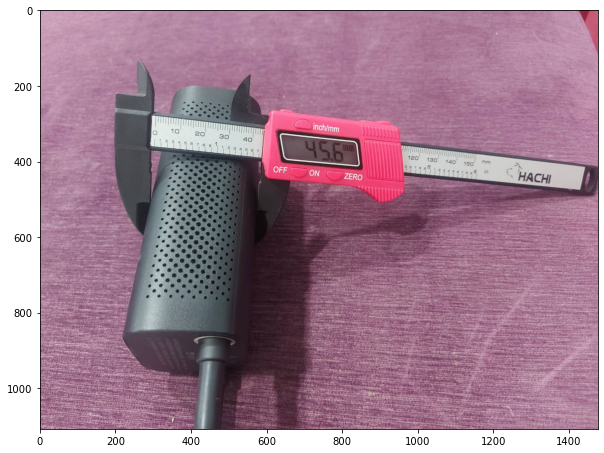

In [26]:
url = "626519.jpg"
img = io.imread(url)
plt.figure(figsize=(10,10))
plt.imshow(img)

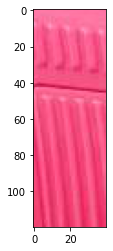

In [67]:
x = img[300:420, 860:900]
x_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(x)

# find Histogram

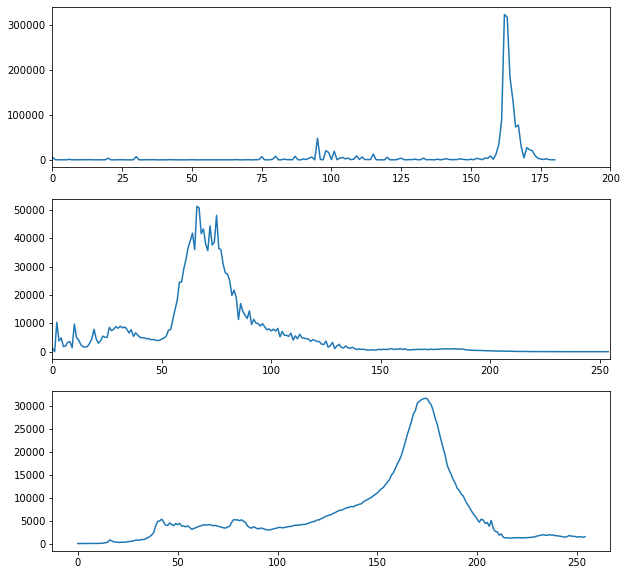

In [89]:
hist0 = cv2.calcHist([x_hsv], [0], mask = None, histSize = [181], ranges = [0, 180])
hist1 = cv2.calcHist([x_hsv], [1], mask = None, histSize = [255], ranges = [0, 255])
hist2 = cv2.calcHist([x_hsv], [2], mask = None, histSize = [255], ranges = [0, 255])

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(hist0)
plt.xlim([0, 200])
plt.subplot(3,1,2)
plt.plot(hist1)
plt.xlim([0, 255])
plt.subplot(3,1,3)
plt.plot(hist2)


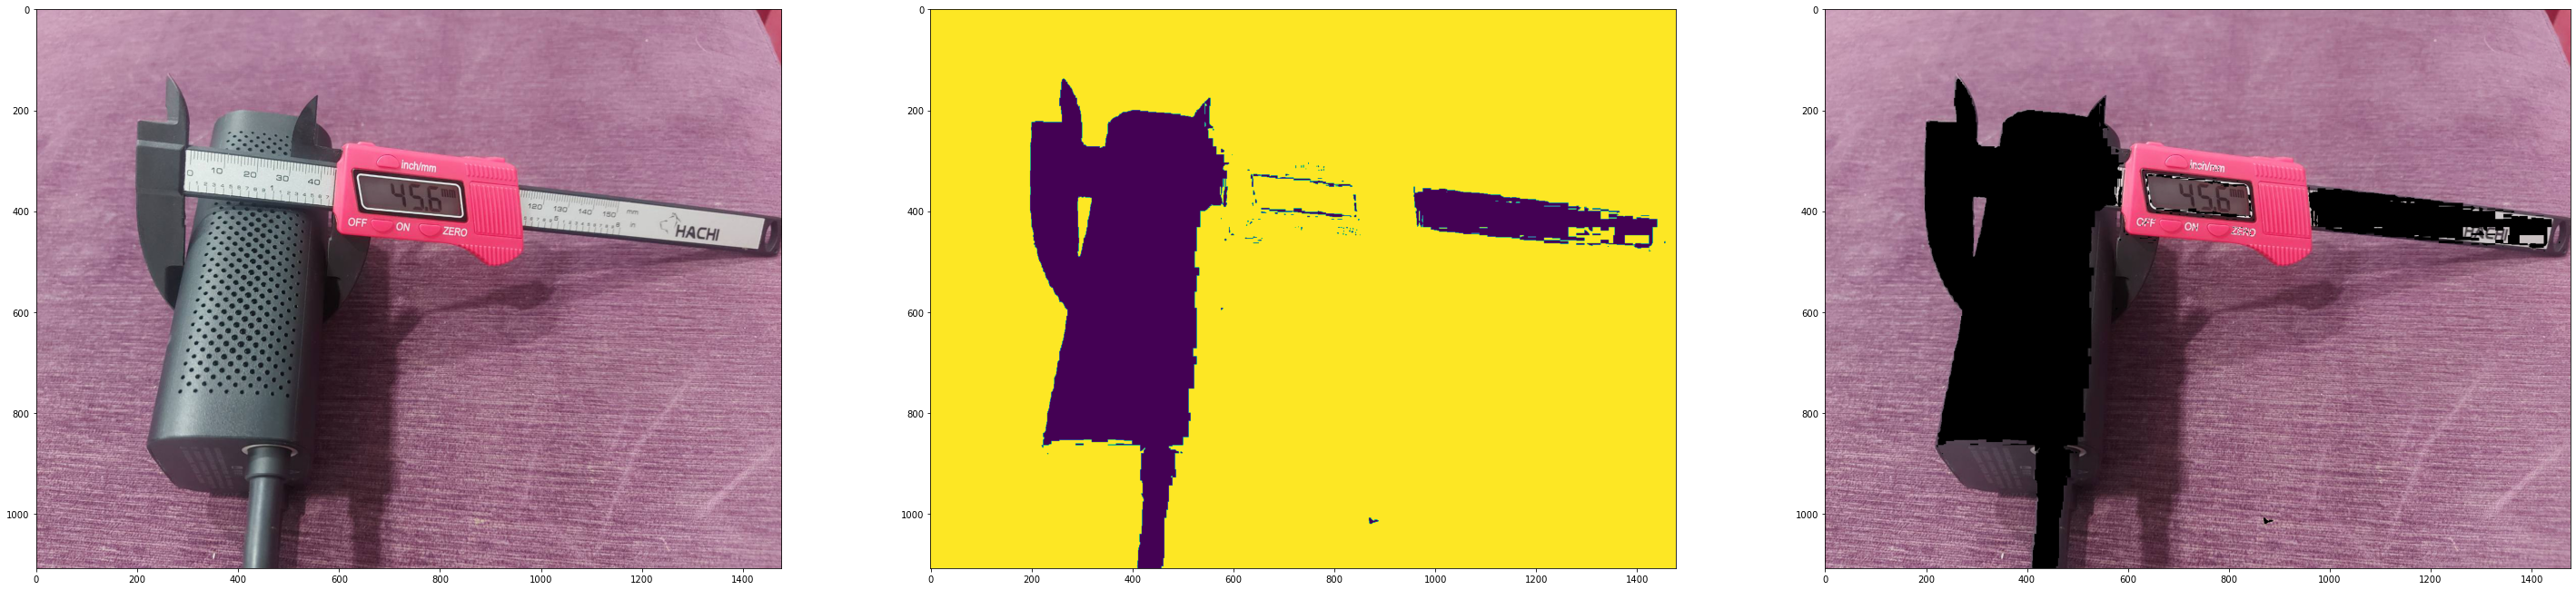

In [91]:
  
# define range of blue color in HSV
low_red = np.array([150, 0, 0], dtype=np.uint8)
high_red = np.array([180, 255,255], dtype=np.uint8)

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, low_red, high_red)



# Bitwise-AND mask and original image
res = cv2.bitwise_and(img,img, mask= mask)

plt.figure(figsize=(50,50))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(mask)
plt.subplot(1,3,3)
plt.imshow(res)

In [35]:
d = pytesseract.image_to_string(img)
d

''